In [3]:
import sys
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/')
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/cv_clustering')
import pickle
with open('/Users/lee_jollans/Projects/clustering_pilot/IXI2/act//IXI2_TSc_mod_6','rb') as f:
    mod=pickle.load(f)


In [4]:
mod.all_clus_labels.shape

(544, 8, 544)

In [5]:
mod.consensus_matrix.shape

(8, 306, 306)

In [6]:
mod.train_index_sub.shape

(306,)

In [46]:
mod.all_clus_labels.shape

(544, 8, 544)

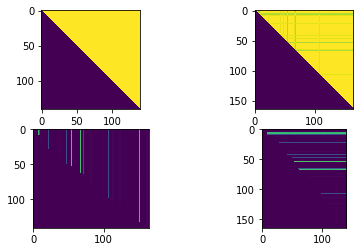

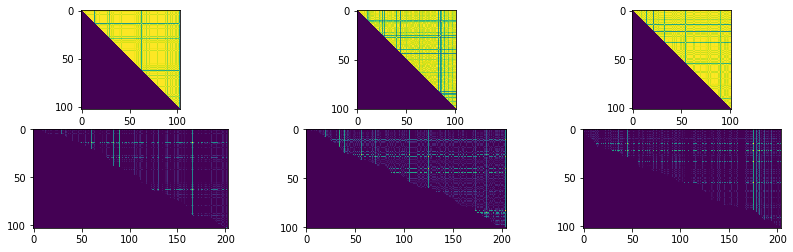

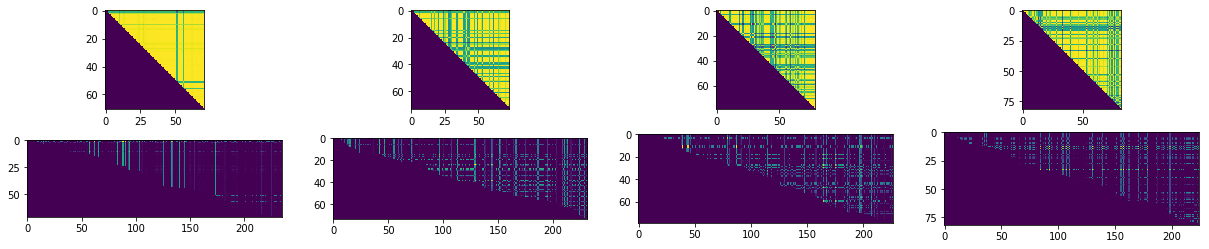

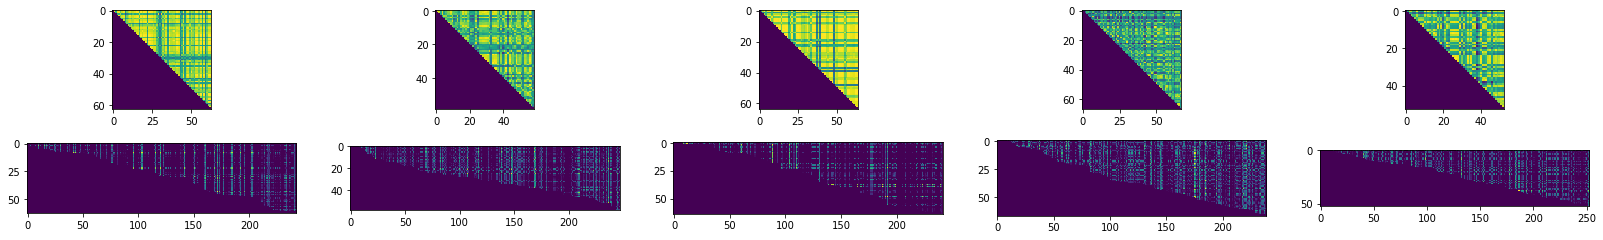

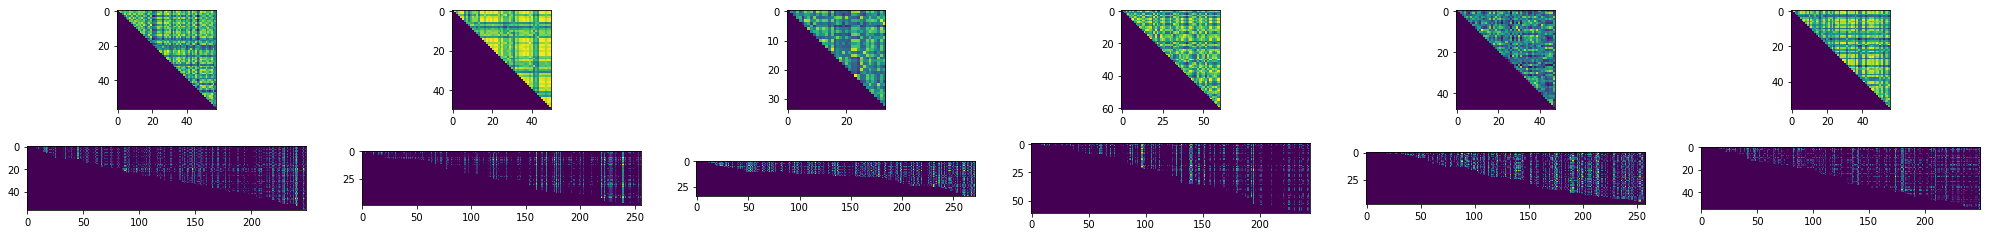

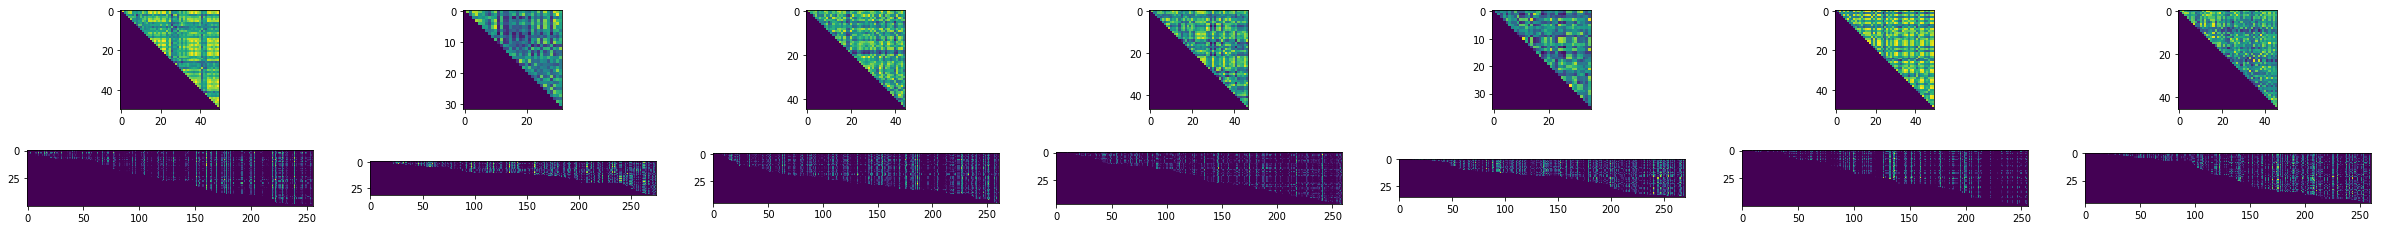

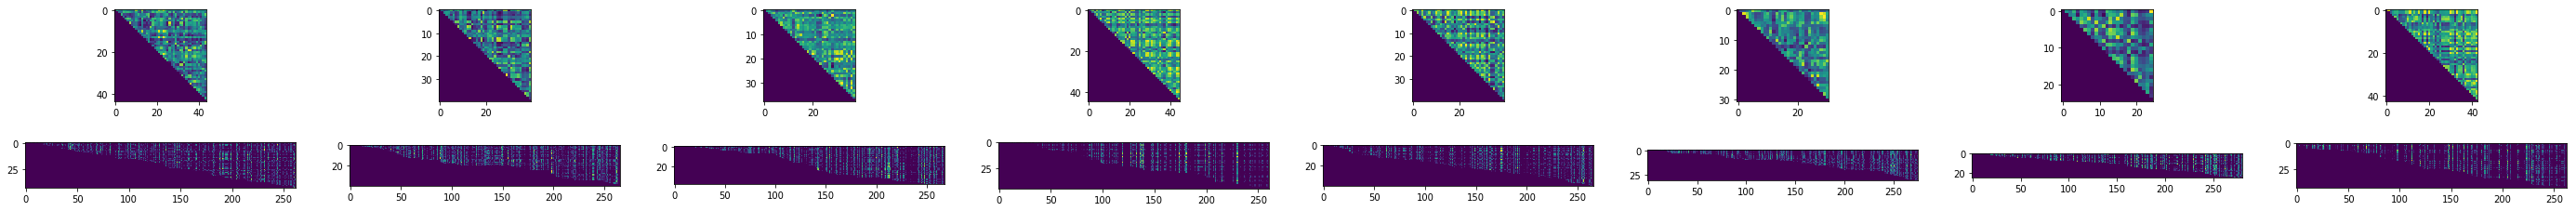

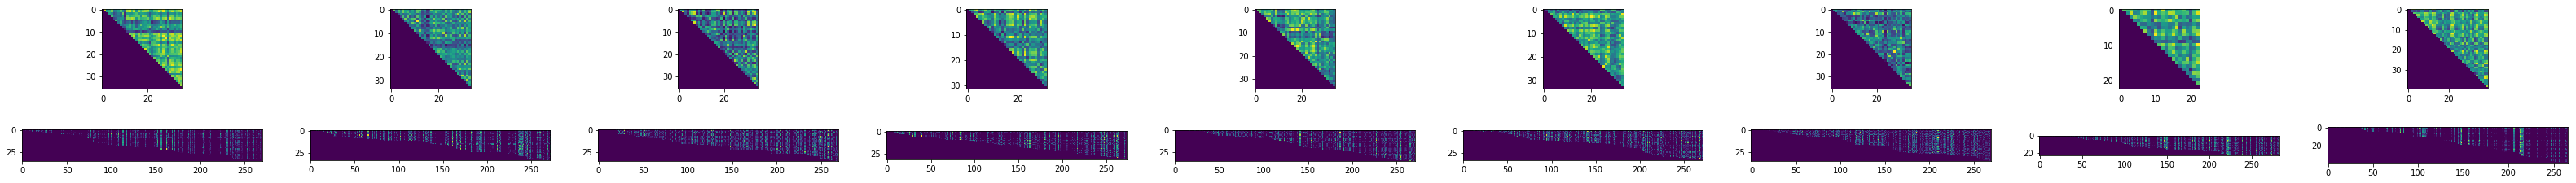

In [14]:
import matplotlib.pyplot as plt
import numpy as np
for c in range(8):
    fig=plt.figure(figsize=[7*(c+1),4])
    for k in range(c+2):
        ccc=mod.consensus_matrix[c,:,:]
        ccc1=ccc[np.where(mod.cluster_ensembles_labels[:,c]==k)[0],:]
        plt.subplot(2,(c+2),k+1)
        plt.imshow(ccc1[:,np.where(mod.cluster_ensembles_labels[:,c]==k)[0]]); 
        plt.subplot(2,(c+2),k+1+c+2)
        plt.imshow(ccc1[:,np.where(mod.cluster_ensembles_labels[:,c]!=k)[0]]); 
    plt.show()
    

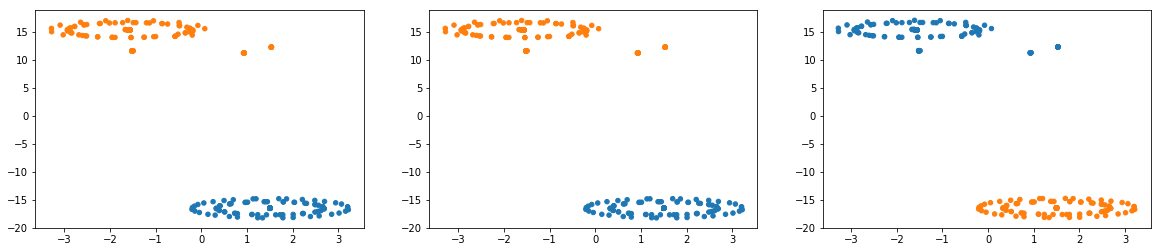

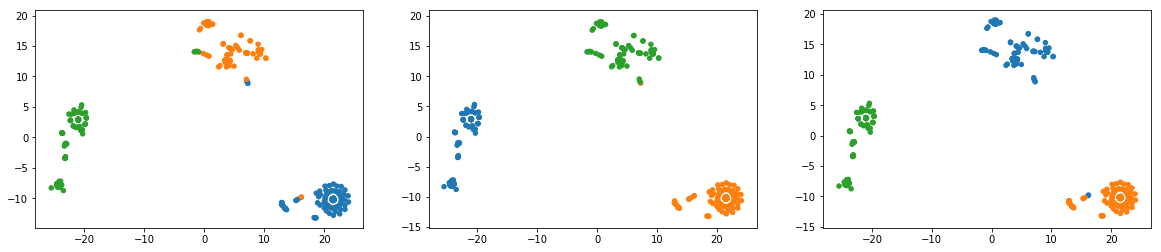

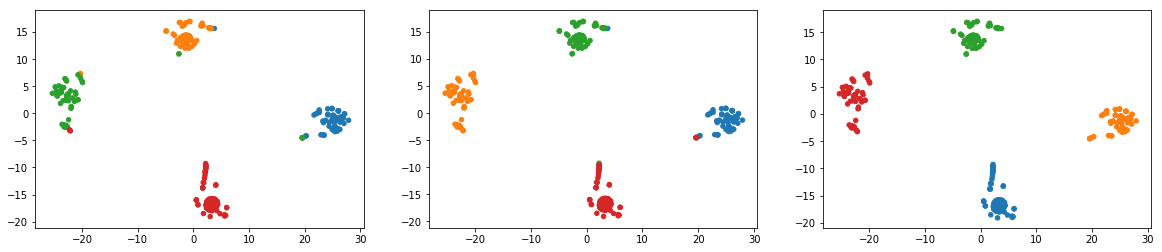

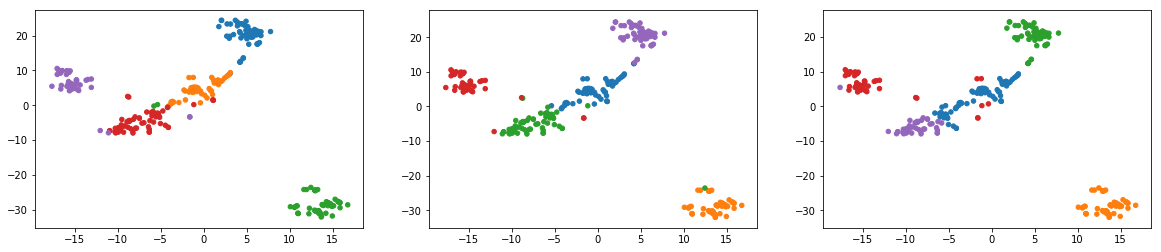

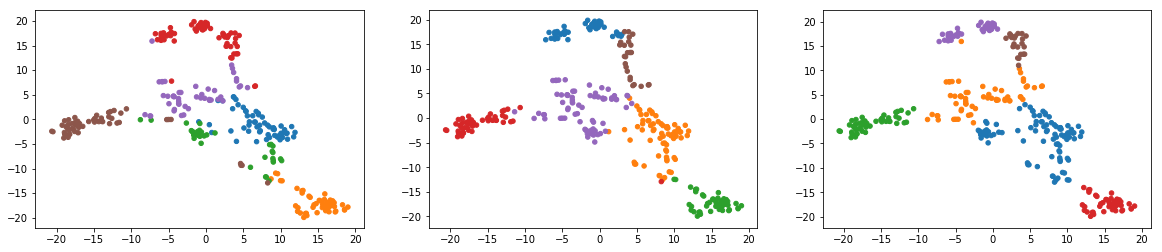

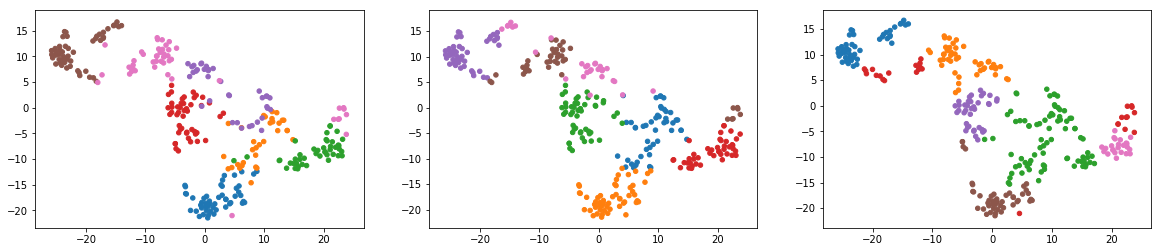

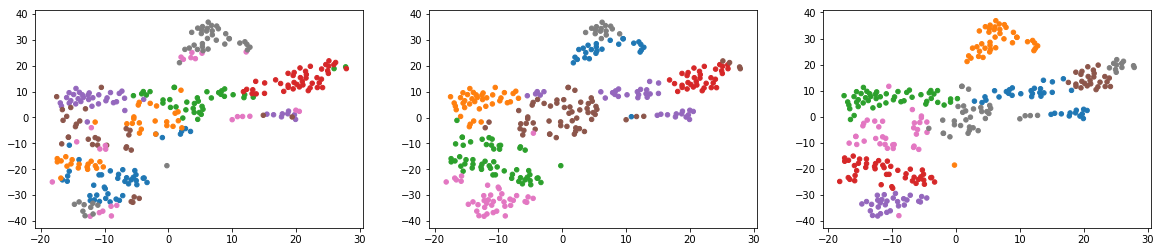

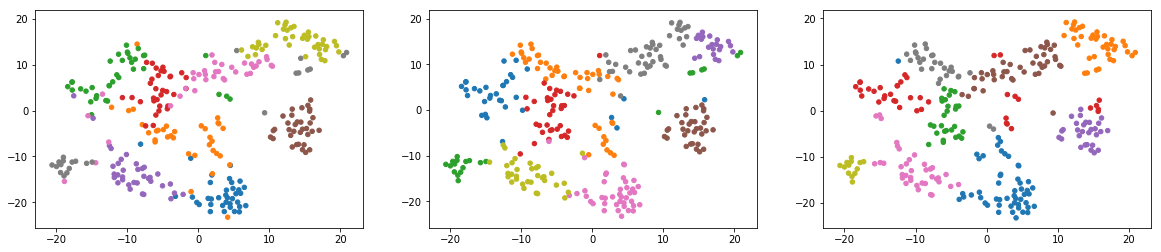

In [73]:
from sklearn.manifold import TSNE
from cv_clustering.utils import colorscatter
from sklearn.cluster import KMeans, AgglomerativeClustering
#fig=plt.figure()
for c in range(8):

    x=mod.all_clus_labels[:,c,:]
    x=x[mod.train_index_sub,:]; x=x[:,mod.train_index_sub]
    #x=x[:100,:]
    x[np.isnan(x)]=1
    #pca = PCA(n_components=10)
    #PCs = pca.fit_transform(x.T)

    
    fig=plt.figure(figsize=[20,4]); 
    
    ax=plt.subplot(1,3,1)
    #tsne = TSNE(n_components=2).fit_transform(PCs)
    #colorscatter(tsne, mod.cluster_ensembles_labels[:,c], np.ones(306)*4, ax, 0)
    
    #ax=plt.subplot(1,2,2)
    tsne = TSNE(n_components=2).fit_transform(x.T)
    #print(tsne.shape)
    colorscatter(tsne, mod.cluster_ensembles_labels[:,c], np.ones(306)*4, ax, 0)
    
    ax=plt.subplot(1,3,2)
    kmeans = KMeans(n_clusters=c+2, random_state=0).fit(x.T)
    kk=kmeans.labels_
    #print(len(kk))
    colorscatter(tsne, kk, np.ones(306)*4, ax, 0)
    
    ax=plt.subplot(1,3,3)
    clustering = AgglomerativeClustering(n_clusters=c+2, linkage='ward').fit(x.T)
    kk=clustering.labels_
    #print(len(kk))
    colorscatter(tsne, kk, np.ones(306)*4, ax, 0)
    
    plt.show()

In [44]:
mod.consensus_matrix.shape

(8, 306, 306)